~o~ This Study: L-Band  ( GBT )  ~o~
SEFD : 7.7251
Sens : 5.4624705953441985
Max Distance (m) : 1.559283646470252e+19
EIRP : 166897266757314.56
BeamSize : 0.015329777696809932
Sky Coverage : 0.07664888848404966
CWTFM : 3793.1196990298763
DFM : 3962471.2908216557
~o~ This Study: S-Band  ( GBT )  ~o~
SEFD : 14.8
Sens : 10.465180361560904
EIRP : 392983109323863.94
Max Distance (m) : 1.7286562927701987e+19
BeamSize : 0.006520226808662067
Sky Coverage : 0.11084385574725514
CWTFM : 2828.1012247962676
DFM : 3077651.2242628033
~o~ This Study: C-Band  ( GBT )  ~o~
SEFD : 10.6468
Sens : 7.528424477936935
Max Distance (m) : 2.886524607537771e+19
EIRP : 788250927642972.1
BeamSize : 0.0009908646888199468
Sky Coverage : 0.019817293776398934
CWTFM : 3059.658205982589
DFM : 3645623.3481046883
~o~ This Study: X-Band  ( GBT )  ~o~
SEFD : 15.2522
Sens : 10.78493404801346
EIRP : 719385336329216.4
Max Distance (m) : 2.3039184980844466e+19
BeamSize : 0.0003519232712766283
Sky Coverage : 0.008094235239362452

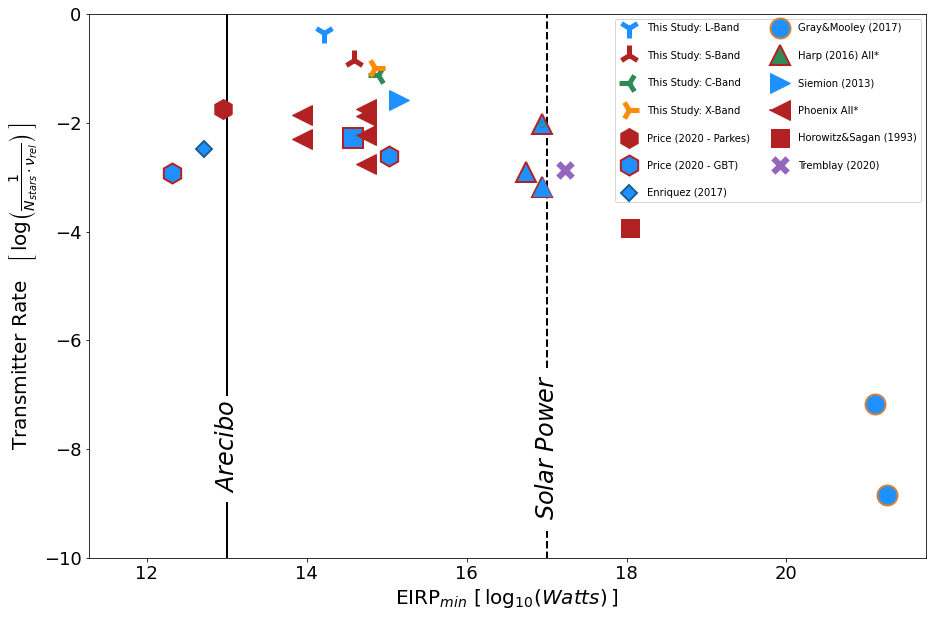

In [1]:
import os
wd = 'seti_limits_py3'
if os.getcwd().find(wd) == -1:
    os.chdir(wd)

from color_coded_ET_power_law import *

from LBand_SETI_compare import lband_compare
from SBand_SETI_compare import sband_compare
from CBand_SETI_compare import cband_compare
from XBand_SETI_compare import xband_compare
import numpy as np

def seti_compare(y_label_units=True):
    ''' Compare SETI project with previus surveys.
    '''

    ldist = 505.33
    sdist = 560.22
    cdist = 935.46
    xdist = 746.65

    # Get dictionaries of plot-relevant values
    Lband = lband_compare(ldist, save=False)
    Sband = sband_compare(sdist, save=False)
    Cband = cband_compare(cdist, save=False)
    Xband = xband_compare(xdist, save=False)

    # Place all dictionaries in list --> Allows plotting via for-loop
    dict_list = [Lband, Sband, Cband, Xband]
    colors = ['dodgerblue',  'firebrick', 'seagreen', 'darkorange']
    markers = ['1', '2', '3', '4']

    #---------------------------------------------------------------------------------
    # plotting setup
    plt.ion()
    plt.figure(figsize=(15, 10))
    alpha = 0.7
    ms = 20
    fontsize = 20
    ticksize = fontsize - 2
    dot_size = ms - 12

    band_handles = {'L':[],'S':[],'C':[],'X':[]}
    band_letters = ['L','S','C','X']
    # Plot values for all 4 bands
    for i, band_dict in enumerate(dict_list): 

        outside, = plt.plot(np.log10(band_dict['EIRP']),np.log10(1./band_dict['rarity']),marker=markers[i], mew=5, linestyle='None', color=colors[i], markersize=ms)
        
        band_handles[band_letters[i]].append(outside)
       
    # plot values of other surveys
    h = ET_power_law()

    plt.legend([band_handles['L'][0], band_handles['S'][0], band_handles['C'][0], band_handles['X'][0], 
                h['p1'], h['p2'], h['e'], h['gm'], h['h_a1'], h['s1'], h['pha'], h['hs'], h['m']], 
               ['This Study: L-Band', 'This Study: S-Band', 'This Study: C-Band', 'This Study: X-Band',
                'Price (2020 - Parkes)', 'Price (2020 - GBT)','Enriquez (2017)','Gray&Mooley (2017)', 'Harp (2016) All*','Siemion (2013)',
                'Phoenix All*','Horowitz&Sagan (1993)', 'Tremblay (2020)'],
               labelspacing=1.75,
               ncol=2)
    
    plt.ylim(-10,0)

    plt.xlabel(r'EIRP$_{min}\ \left[\/\log_{10}\left(Watts\right)\/\right]$',fontsize = fontsize)
    
    if y_label_units:
        plt.ylabel(r'Transmitter Rate   $\left[\/\log\left(\frac{1}{N_{stars} \cdot \nu_{rel}}\right)\/\right]$',fontsize=fontsize)
    else:
        plt.ylabel('Transmitter Rate ',fontsize=fontsize)

    plt.xticks(fontsize = ticksize)
    plt.yticks(fontsize = ticksize)
    
seti_compare()